<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-Raw-Data" data-toc-modified-id="Read-Raw-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read Raw Data</a></span></li><li><span><a href="#Industry-Analysis" data-toc-modified-id="Industry-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Industry Analysis</a></span><ul class="toc-item"><li><span><a href="#Raw-Data" data-toc-modified-id="Raw-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Raw Data</a></span><ul class="toc-item"><li><span><a href="#Overall" data-toc-modified-id="Overall-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Overall</a></span></li><li><span><a href="#Scatter" data-toc-modified-id="Scatter-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Scatter</a></span></li></ul></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Regression</a></span></li></ul></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Correlation</a></span></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import os
import numpy as np
import pandas as pd
from datetime import datetime
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
# File Path
!tree

.
├── Data
│   ├── data.csv
│   └── data2.csv
└── GDP_Analysis.ipynb

1 directory, 3 files


---

## Read Raw Data

In [3]:
home_path = os.getcwd() + '/'
filepath = home_path + 'Data/data2.csv'

In [4]:
df = pd.read_csv(filepath)
print(df.shape)
df.head(3)

(30, 12)


,year,Manufacturing,Construction,Utilities,Wholesale Trade,Transportation,Accommodation&Food,Information,Finance,Business Services,Other Goods&Services,Total GDP
0,1989,18491.3,3596.1,1563.6,9392.8,8695.9,3551.9,1230.4,7580.5,12899.3,10857.0,77858.8
1,1990,20247.4,3868.8,1691.3,10466.1,9440.1,3651.8,1402.6,9201.4,13682.9,11707.9,85360.3
2,1991,21349.2,4565.1,1801.3,11541.8,10036.3,3668.0,1590.6,9752.2,14661.3,12462.4,91428.2


## Industry Analysis

### Raw Data

#### Overall

In [6]:
sns.set_style('darkgrid')

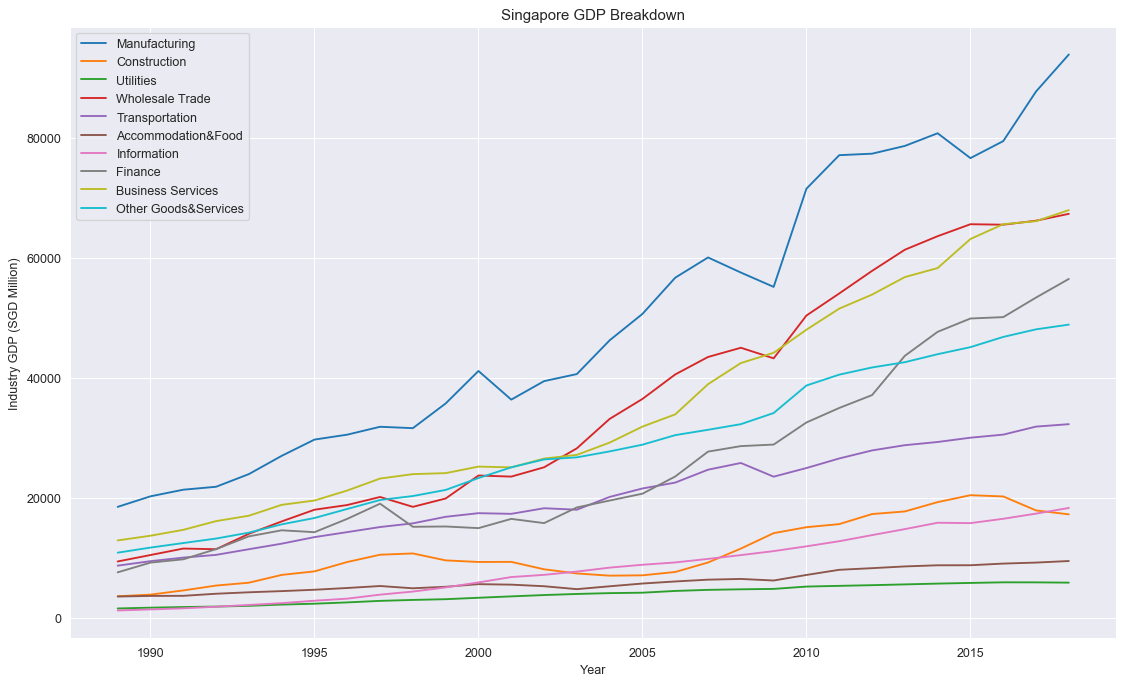

In [7]:
plt.figure(figsize=[15, 9], dpi=90)

columns_list = df.columns.to_list()[:-1]
for i in range(1, len(columns_list)):
    plt.plot(df.year, df[columns_list[i]], label=columns_list[i])

plt.xlabel('Year')
plt.ylabel('Industry GDP (SGD Million)')
plt.title('Singapore GDP Breakdown')

plt.legend()

plt.show()

#### Scatter

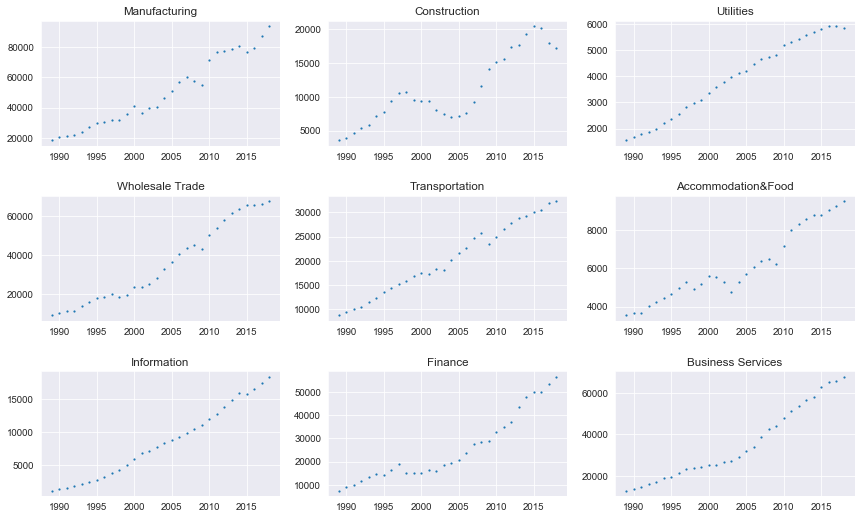

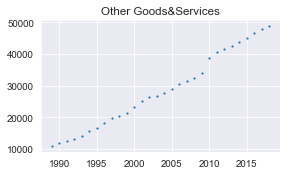

In [8]:
fig = plt.figure(1, figsize=[15, 9], dpi=70)
industry_list = df.iloc[:,1:11].columns.to_list()

# subplots need less than 10
for i in range(len(industry_list)-1):
    count = i+1
    ax = plt.subplot('33%s' % str(count))
    ax.set_title('%s' % industry_list[i]) 
    ax.scatter(df.year, df[industry_list[i]], s=1.5)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4)
plt.show()

# the 10th subplot
fig1 = plt.figure(1, figsize=[15, 2.5], dpi=70)
ax1 = plt.subplot('131')
ax1.set_title(industry_list[-1])
ax1.scatter(df.year, df[industry_list[-1]], s=1.5)
plt.show()

### Regression

$$
\begin{align*}
std &= \sqrt{\frac{1}{N}\sum_{i=1}^{N}(\hat{y}_i - y_i)^2}\\
R^2 &= 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum (y_i-\hat{y}_i)^2}{\sum (y_i-\bar{y})^2}
\end{align*}
$$

In [9]:
def std_func(y_test, y):
    return np.sqrt(np.mean((y_test-y)**2))

def R_Squared_func(y_test, y):
    return 1-((y_test-y)**2).sum() / ((y.mean() - y)**2).sum()


==================== Manufacturing ====================
*Regression Function is:
            8             7             6            5          4
4.396e-13 x - 2.425e-09 x + 1.773e-06 x + 0.007974 x - 0.0187 x
              3             2
 - 3.207e+04 x - 2.849e+07 x + 1.575e+11 x - 1.149e+14
*R Squared is: 0.979430462125422


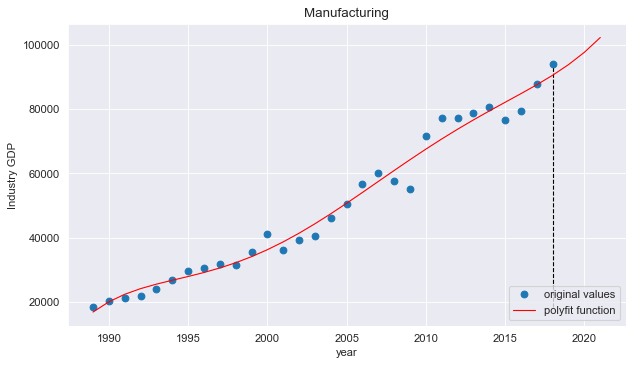


==================== Construction ====================
*Regression Function is:
          4        3             2
-0.3952 x + 3168 x - 9.522e+06 x + 1.272e+10 x - 6.373e+12
*R Squared is: 0.9673230265343472


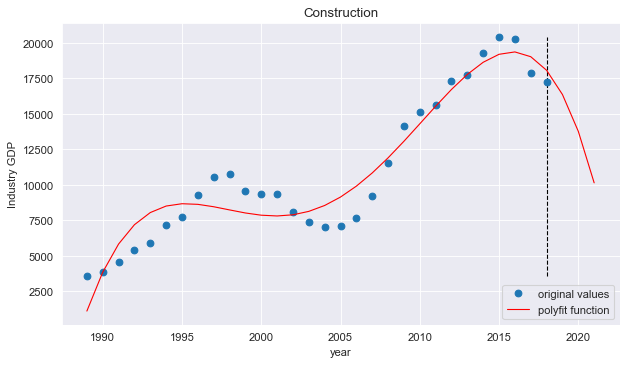


==================== Utilities ====================
*Regression Function is:
            8             7             6             5             4
-2.39e-14 x + 1.317e-10 x - 9.584e-08 x - 0.0004325 x - 0.0005096 x
         3             2
 + 1736 x + 1.548e+06 x - 8.521e+09 x + 6.207e+12
*R Squared is: 0.9989732827917426


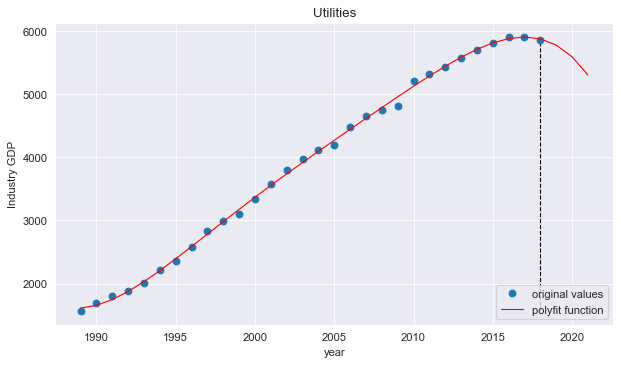


==================== Wholesale Trade ====================
*Regression Function is:
          4        3             2
-0.3789 x + 3033 x - 9.107e+06 x + 1.215e+10 x - 6.08e+12
*R Squared is: 0.9944367476189232


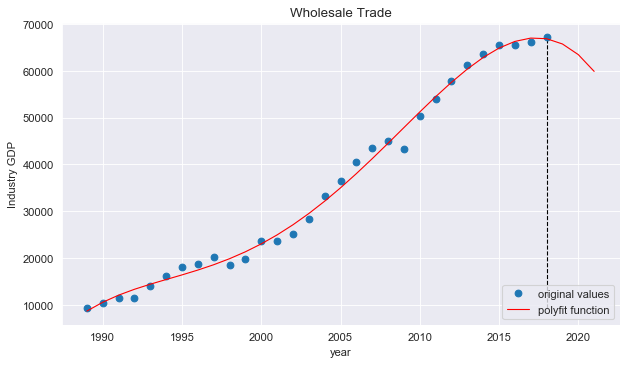


==================== Transportation ====================
*Regression Function is:
           8             7             6             5            4
1.09e-14 x - 6.045e-11 x + 4.483e-08 x + 0.0001993 x - 0.002959 x
          3             2
 - 806.6 x - 7.083e+05 x + 3.972e+09 x - 2.912e+12
*R Squared is: 0.9916685114562946


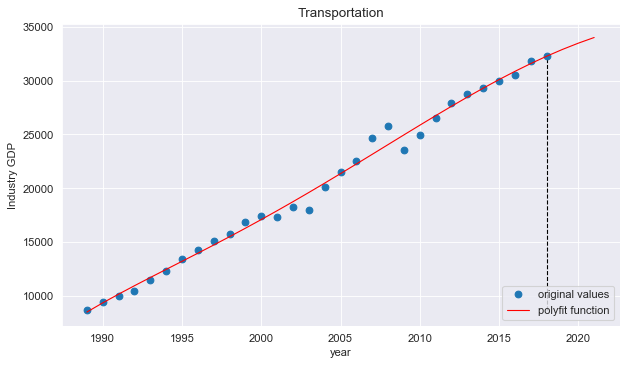


==================== Accommodation&Food ====================
*Regression Function is:
           4         3             2
-0.05717 x + 458.4 x - 1.378e+06 x + 1.842e+09 x - 9.228e+11
*R Squared is: 0.9803076124812761


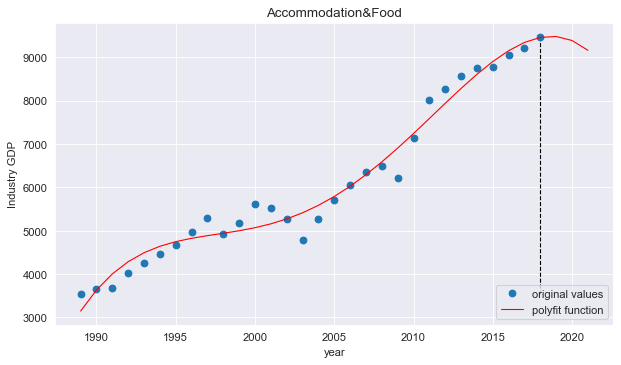


==================== Information ====================
*Regression Function is:
             8             7             6            5            4
-7.874e-14 x + 4.341e-10 x - 3.167e-07 x - 0.001427 x + 0.001057 x
         3             2
 + 5734 x + 5.102e+06 x - 2.815e+10 x + 2.052e+13
*R Squared is: 0.9981312262248431


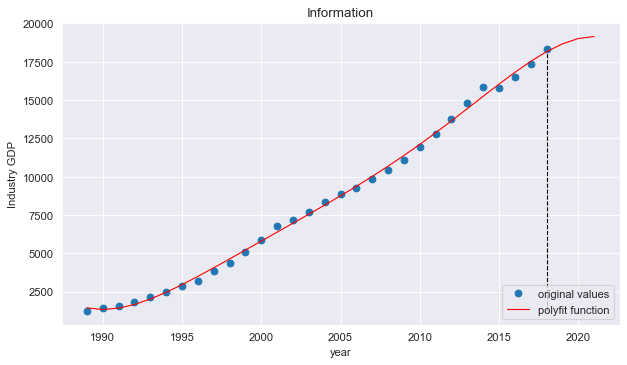


==================== Finance ====================
*Regression Function is:
          4        3             2
-0.3848 x + 3086 x - 9.281e+06 x + 1.24e+10 x - 6.217e+12
*R Squared is: 0.9919792204092073


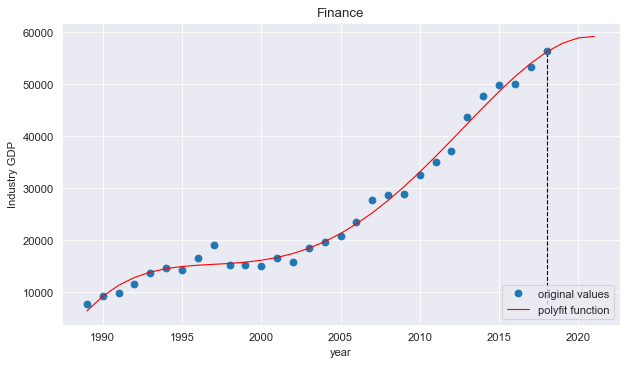


==================== Business Services ====================
*Regression Function is:
          4        3             2
-0.3787 x + 3035 x - 9.119e+06 x + 1.218e+10 x - 6.099e+12
*R Squared is: 0.9970412267844704


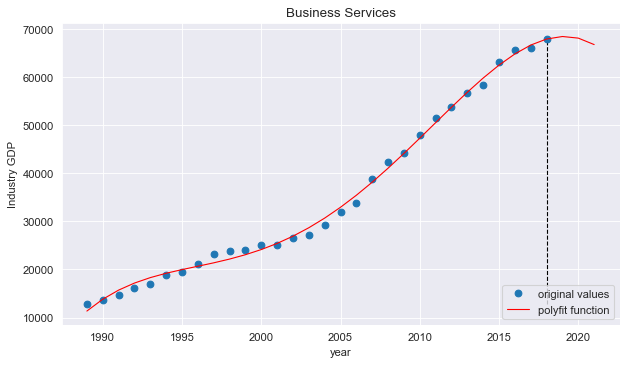


==================== Other Goods&Services ====================
*Regression Function is:
           4         3             2
-0.07438 x + 595.7 x - 1.789e+06 x + 2.388e+09 x - 1.195e+12
*R Squared is: 0.9967828250954143


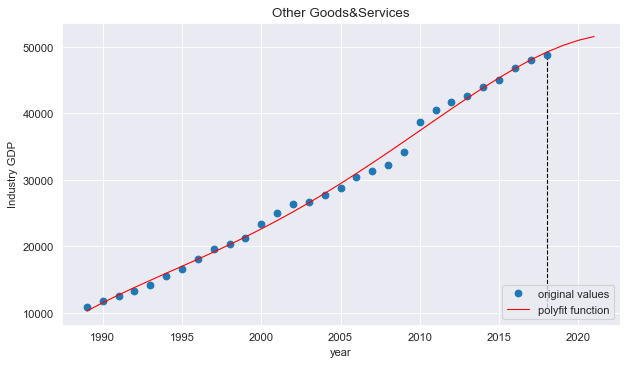

In [28]:
# Regression
x = np.array(df.year)

industry_list = df.iloc[:, 1:11].columns.to_list()

# For all industries
for i in range(len(industry_list)):
    y = np.array(df[industry_list[i]])
    
    r2_list = []
    for j in range(1, 10):
        f = np.polyfit(x, y, j)
        reg = np.poly1d(f)
        y_reg = reg(x)
        
        r2 = R_Squared_func(y_reg, y)
        r2_list.append(r2)
    
    R2 = max(r2_list)
    o = r2_list.index(max(r2_list))
    
    f = np.polyfit(x, y, o)
    reg = np.poly1d(f)
    
    new_x = np.array(list(x) + [2019, 2020, 2021])
    y_reg = reg(new_x)
    
    print('')
    print('='*20, '%s' % industry_list[i], '='*20)
    print('*Regression Function is:\n', reg)
    print('*R Squared is: %s' % str(R2))
    
    # Plot
    fig = plt.figure(i+1, figsize=[9, 5], dpi=80)
    
    plot1 = plt.plot(x, y, 'o',label='original values')
    plot2 = plt.plot(new_x, y_reg, 'r',label='polyfit function', linewidth=1)
    plot3 = plt.vlines(2018, y.min(), y.max(), linestyles = 'dashed', linewidth=1)
    plt.xlabel('year')
    plt.ylabel('Industry GDP')
    plt.legend(loc=4)
    plt.title(industry_list[i])
    plt.show()

## Correlation

In [53]:
filepath_percent = home_path + 'Data/data.csv'

In [54]:
df2 = pd.read_csv(filepath_percent)
print(df2.shape)
df2.head(3)

(30, 12)


,year,Manufacturing(%),Construction(%),Utilities(%),Wholesale Trade(%),Transportation(%),Accommodation&Food(%),Information(%),Finance(%),Business Services(%),Other Goods&Services(%),Total GDP (%)
0,1989,23.75,4.62,2.01,12.06,11.17,4.56,1.58,9.74,16.57,13.94,100.0
1,1990,23.72,4.53,1.98,12.26,11.06,4.28,1.64,10.78,16.03,13.72,100.0
2,1991,23.35,4.99,1.97,12.62,10.98,4.01,1.74,10.67,16.04,13.63,100.0


In [55]:
df2.iloc[:, 1:11].corr()

,Manufacturing(%),Construction(%),Utilities(%),Wholesale Trade(%),Transportation(%),Accommodation&Food(%),Information(%),Finance(%),Business Services(%),Other Goods&Services(%)
Manufacturing(%),1.000000,-0.447461,0.326594,-0.139620,0.363744,0.277990,-0.242837,-0.580078,-0.449482,0.272844
Construction(%),-0.447461,1.000000,0.021094,-0.561042,0.198871,0.395444,-0.437786,0.213205,0.239338,0.052853
Utilities(%),0.326594,0.021094,1.000000,-0.566274,0.862171,0.553052,-0.361729,-0.791269,-0.517824,0.942395
Wholesale Trade(%),-0.139620,-0.561042,-0.566274,1.000000,-0.809090,-0.936335,0.857833,0.192006,-0.074892,-0.601121
Transportation(%),0.363744,0.198871,0.862171,-0.809090,1.000000,0.842591,-0.726481,-0.565392,-0.311066,0.767877
Accommodation&Food(%),0.277990,0.395444,0.553052,-0.936335,0.842591,1.000000,-0.945544,-0.205367,0.026506,0.543900
Information(%),-0.242837,-0.437786,-0.361729,0.857833,-0.726481,-0.945544,1.000000,0.013611,-0.142851,-0.304743
Finance(%),-0.580078,0.213205,-0.791269,0.192006,-0.565392,-0.205367,0.013611,1.000000,0.544497,-0.746242
Business Services(%),-0.449482,0.239338,-0.517824,-0.074892,-0.311066,0.026506,-0.142851,0.544497,1.000000,-0.437762
Other Goods&Services(%),0.272844,0.052853,0.942395,-0.601121,0.767877,0.543900,-0.304743,-0.746242,-0.437762,1.000000


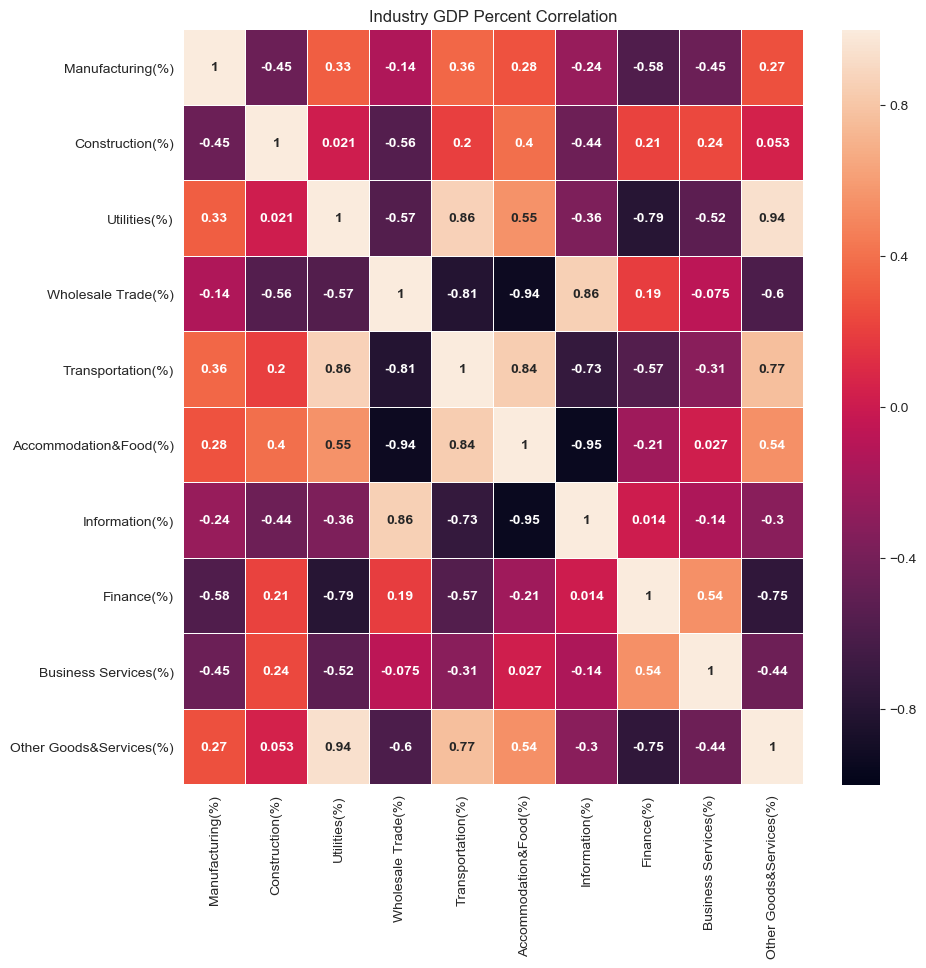

In [57]:
fig = plt.figure(100, figsize=[10, 10], dpi=100)
correction = df2.iloc[:, 1:11].corr()

ax = sns.heatmap(correction, linewidths=0.05,vmax=1, vmin=-1, annot=True, annot_kws={'size':10,'weight':'bold'})
ax.set_ylim([10, 0])
ax.set_title('Industry GDP Percent Correlation')

plt.show()